# 프로젝트로 배우는 데이터사이언스

https://www.boostcourse.org/ds214/joinLectures/28155

**Scikit learn**

## Load packages

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

#Scikit learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
##결정나무 시각화
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
##정확도 구하기
from sklearn.metrics import accuracy_score

## 1. 분류모델 기초

### 1.2 의사결정나무로 간단한 분류 예측 모델 만들기

#### 1.2.1 당뇨병 데이터

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

#### 1.2.2 학습과 예측을 위한 데이터셋 만들기

##### 1) 데이터셋 로드

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### 2) 학습, 예측 데이터셋 나누기

데이터를 8:2의 비율로 나누기

In [6]:
split_count=int(df.shape[0]*0.8)
split_count

614

슬라이싱

In [7]:
train=df[:split_count].copy()
train.shape

(614, 9)

In [8]:
test=df[split_count:].copy()
test.shape

(154, 9)

##### 3) 학습, 예측에 사용할 컬럼

In [9]:
feature_names=train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

##### 4) 정답값이자 예측해야 될 값

In [10]:
label_name=train.columns[-1]
label_name

'Outcome'

##### 5) 학습, 예측 데이터셋 만들기

학습세트

In [11]:
X_train=train[feature_names]
X_train.shape

(614, 8)

정답 값

In [12]:
y_train=train[label_name]
y_train.shape

(614,)

예측 데이터셋

In [13]:
X_test=test[feature_names]
X_test.shape

(154, 8)

예측 정답 값

In [14]:
y_test=test[label_name]
y_test.shape

(154,)

##### 6) 머신러닝 알고리즘 가져오기

In [32]:
model=DecisionTreeClassifier(random_state=42)

##### 7) 학습, 훈련

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### 8) 예측

In [34]:
y_predict=model.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

##### 9) 트리 알고리즘 분석하기

의사결정나무 시각화

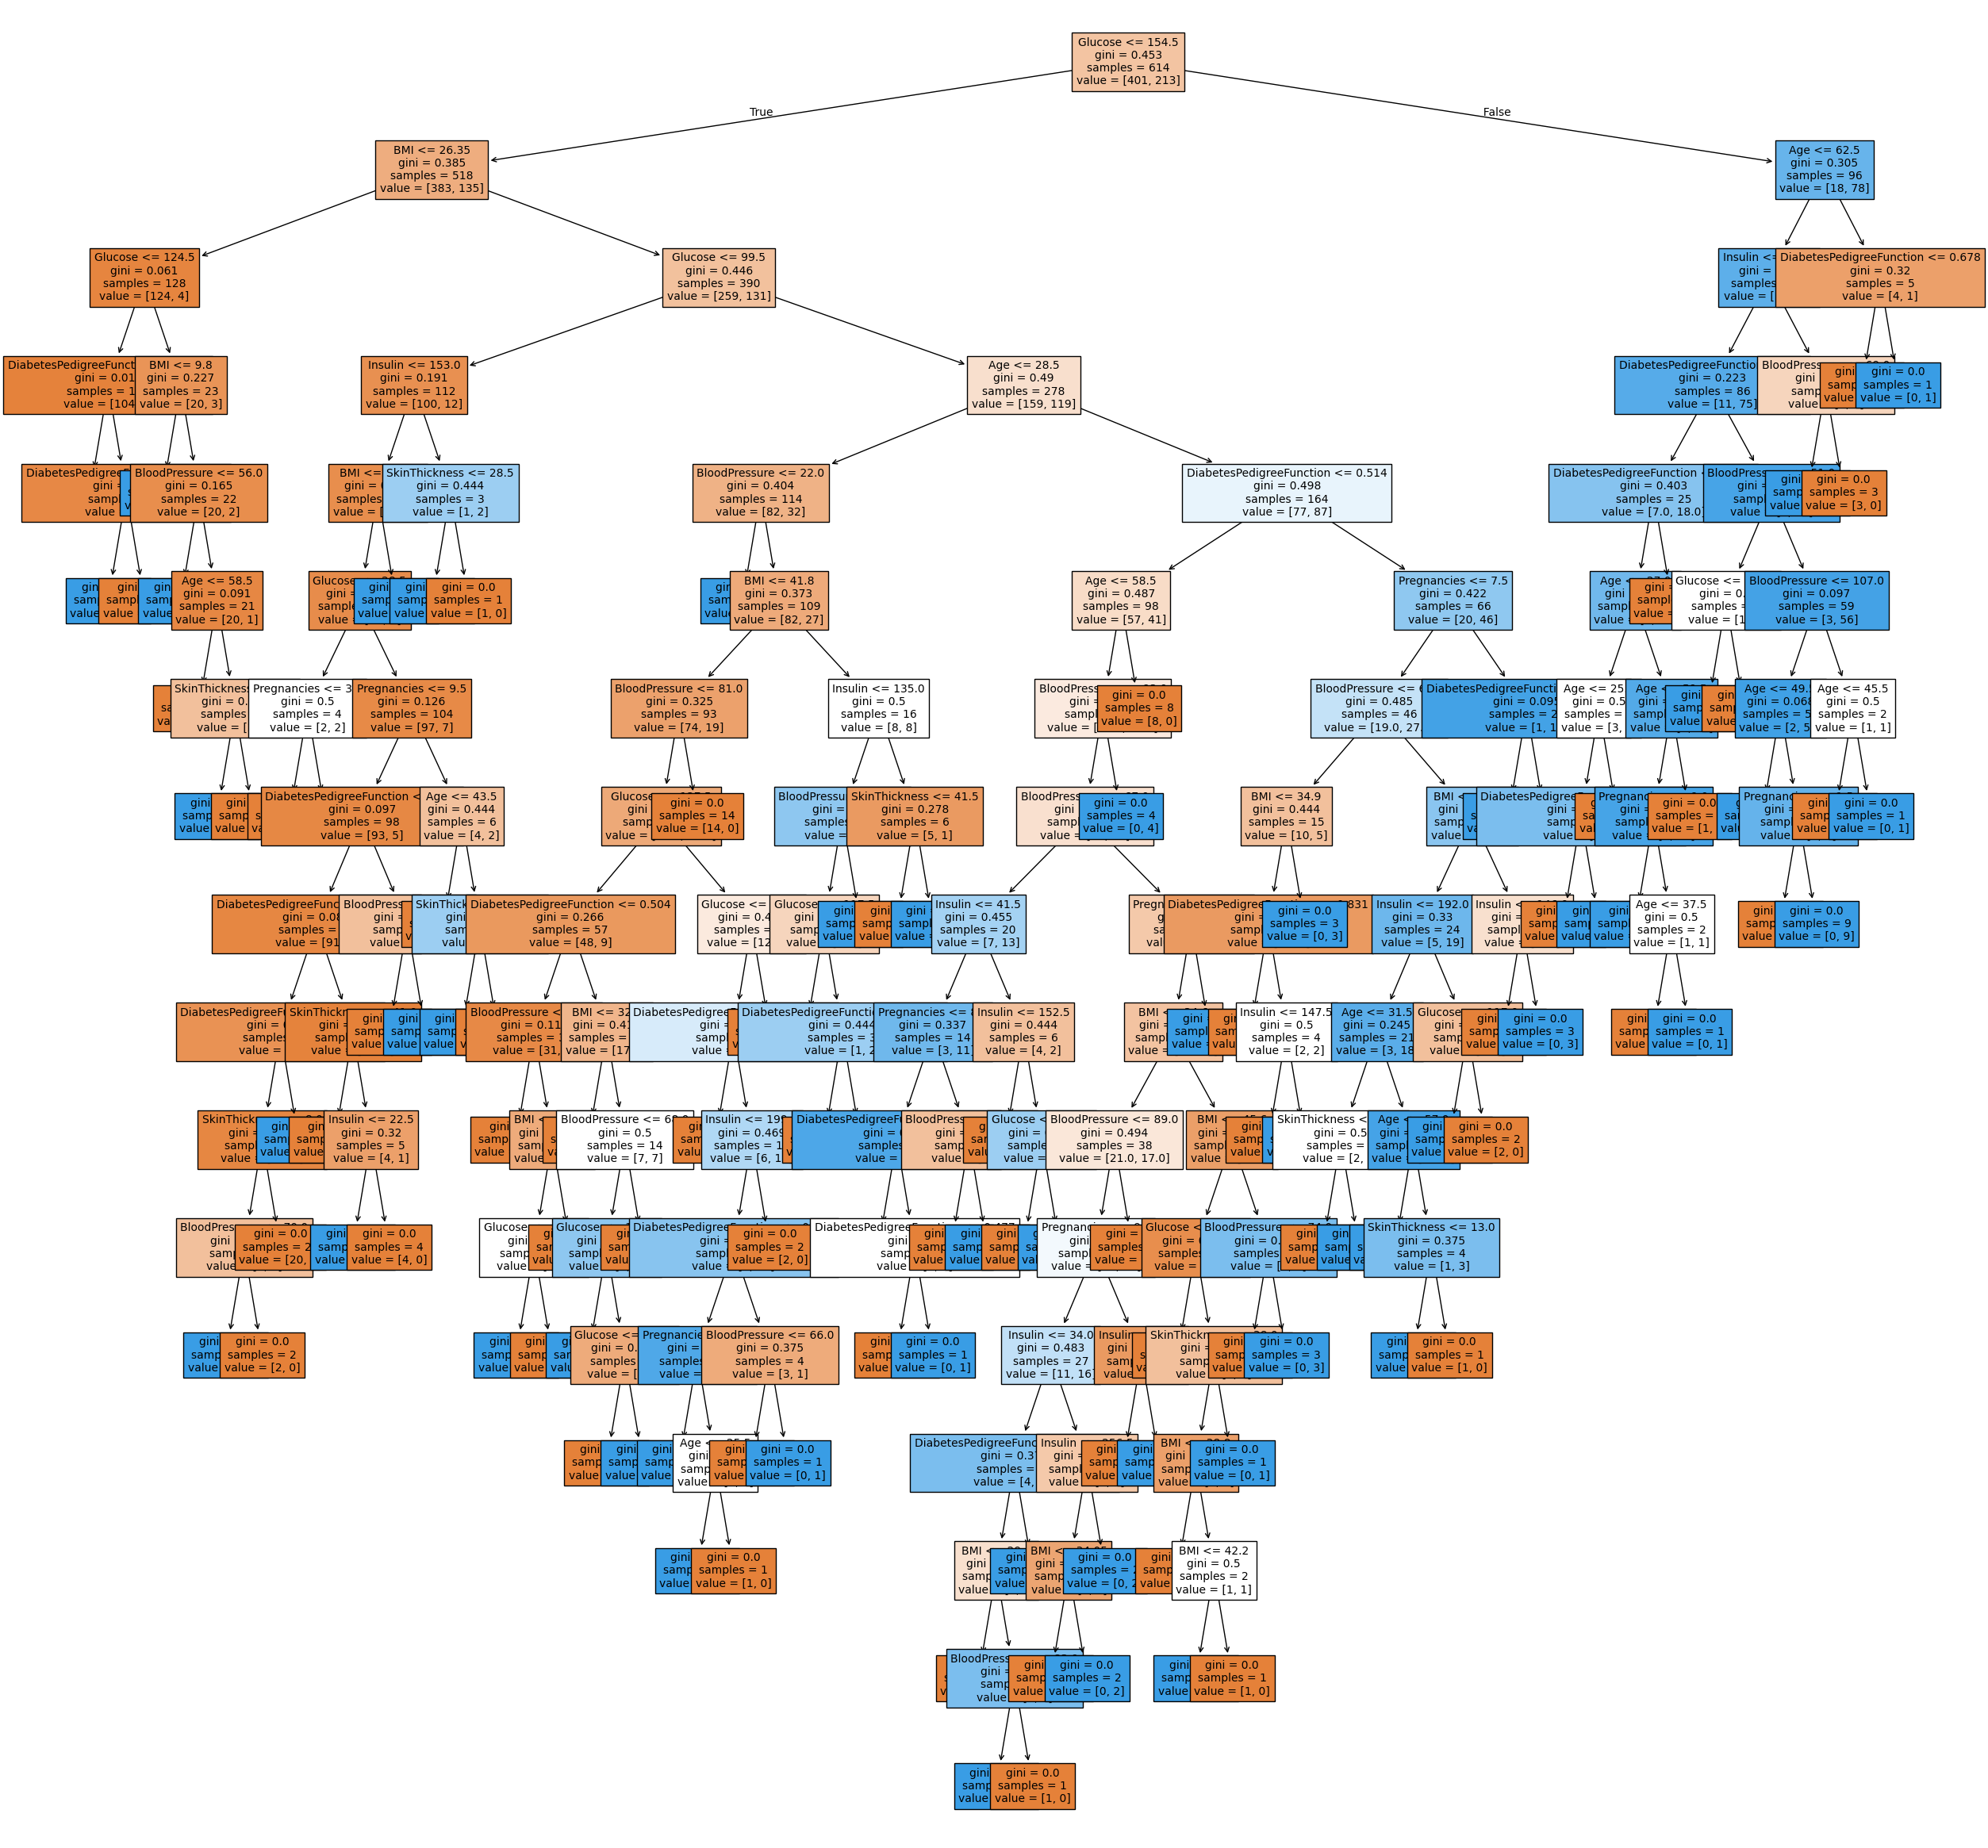

In [35]:
plt.figure(figsize=(30,30))
tree=plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

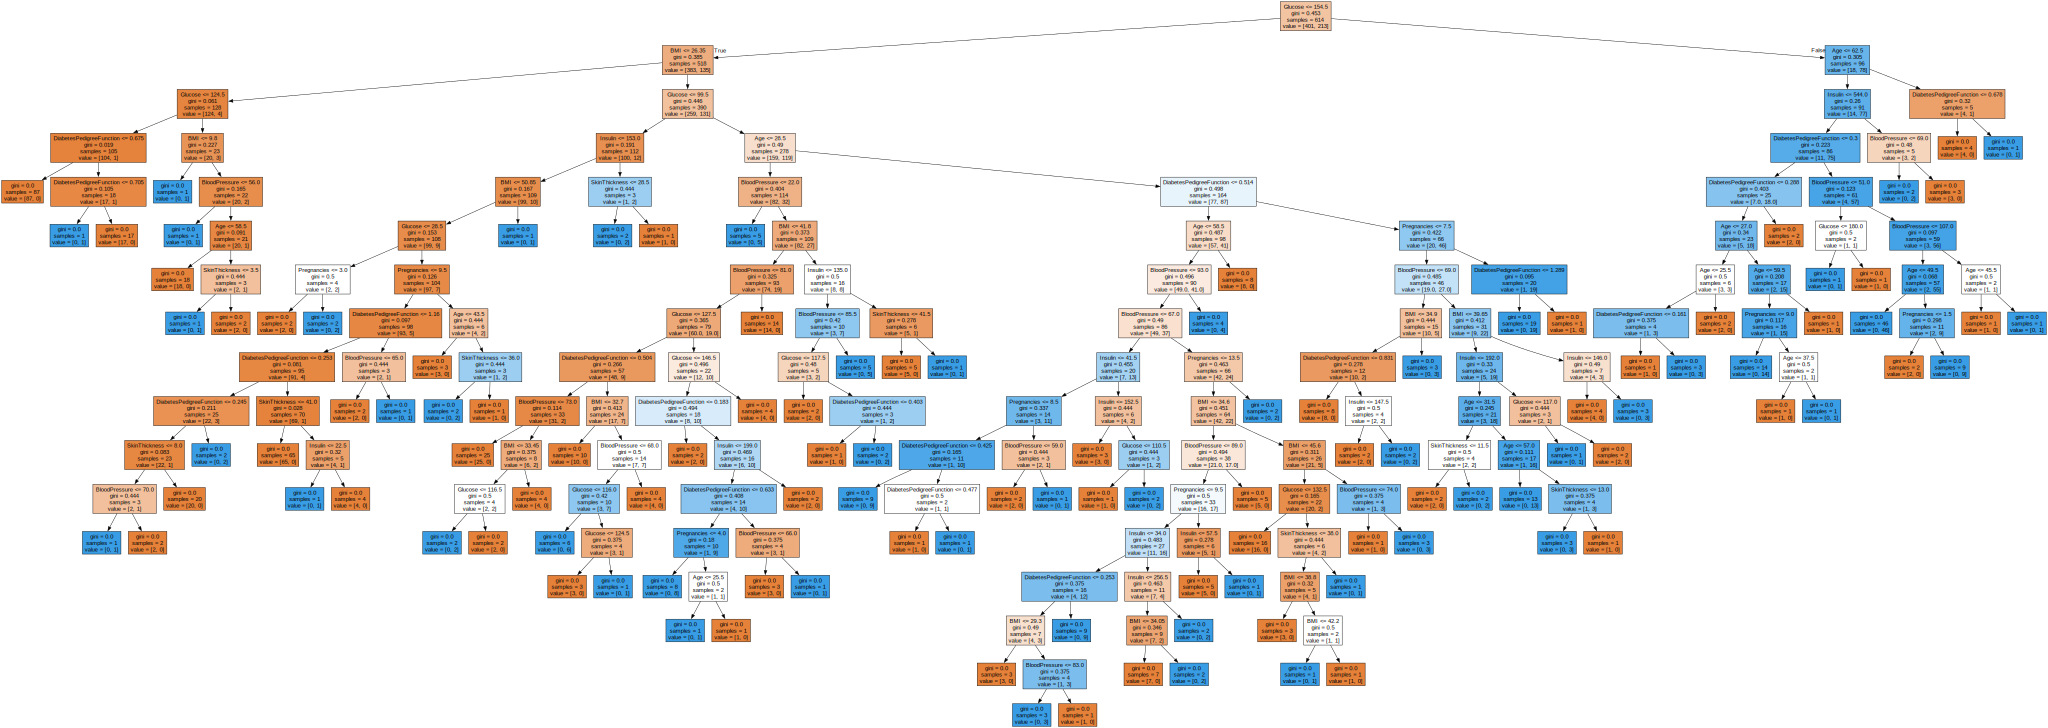

In [36]:
dot_tree=export_graphviz(model, feature_names=feature_names, filled=True)
graphviz.Source(dot_tree)

피쳐의 중요도 추출하기

In [37]:
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

<Axes: >

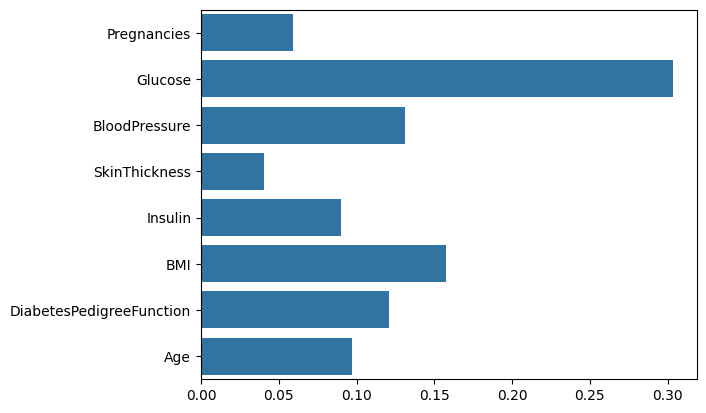

In [38]:
sns.barplot(x=model.feature_importances_, y=feature_names)

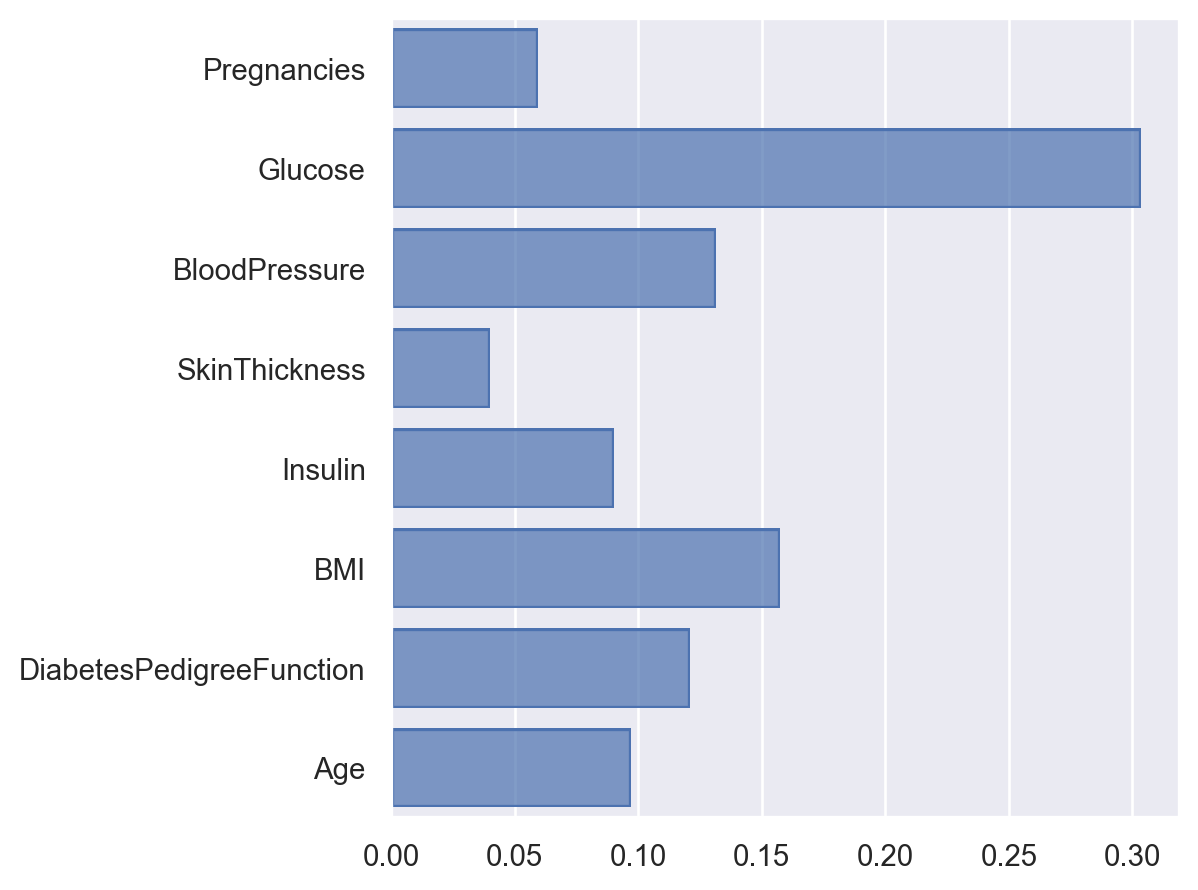

In [39]:
(
    so.Plot(x=model.feature_importances_, y=feature_names)
    .add(so.Bar())
)

##### 10) 정확도(Accuracy) 측정하기

In [41]:
diff_count=abs(y_test-y_predict).sum()
diff_count

44

예측의 정확도

In [44]:
(len(y_test)-diff_count)/len(y_test)*100

71.42857142857143

정확도 구하는 함수

In [46]:
accuracy_score(y_test, y_predict)*100

71.42857142857143

기본 score 속성

In [48]:
model.score(X_test, y_test)*100

71.42857142857143

## 2. EDA를 통해 데이터 탐색하기

### 2.1.1 당뇨병 데이터셋 미리보기

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


최솟값이 0인 변수들이 있다. 이론상 불가능. -> 결측값일 확률 높음

### 2.1.2 결측치 시각화

In [50]:
feature_columns=df.columns[:-1]
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [51]:
cols=feature_columns[1:]
cols

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

0값을 결측치라 가정

In [54]:
df_null=df[cols].replace(0, np.nan)
df_null=df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

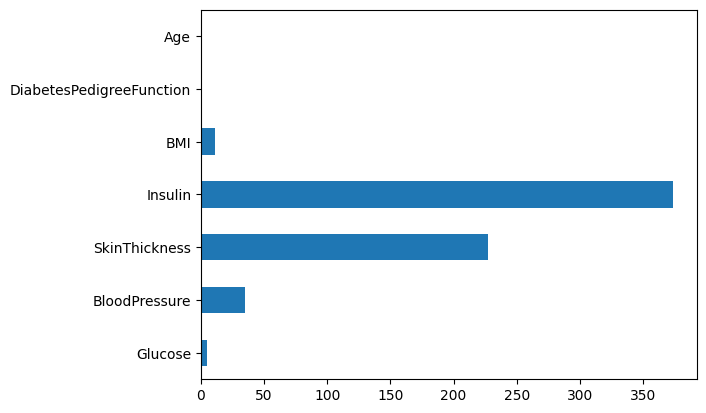

In [55]:
df_null.sum().plot.barh()

In [68]:
df_null.sum().reset_index().columns

Index(['index', 0], dtype='object')

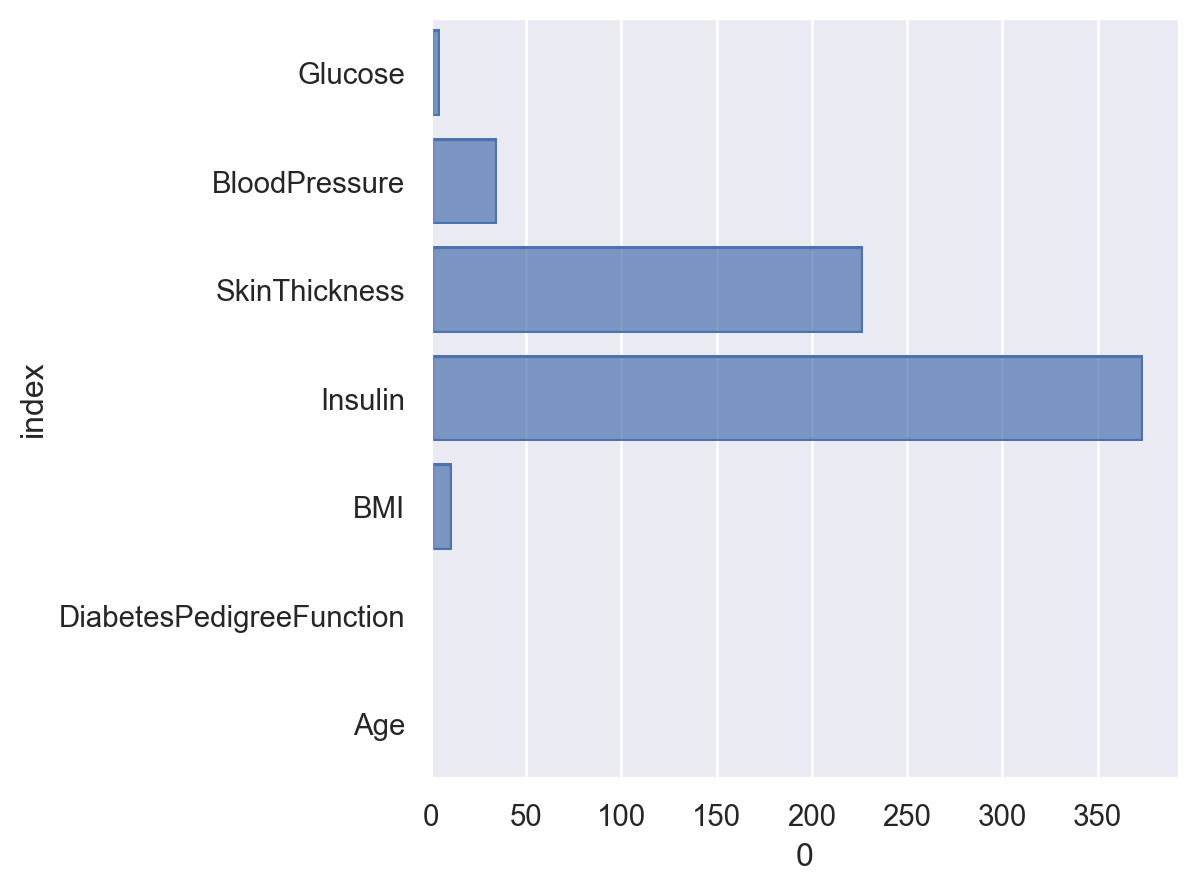

In [69]:
(
    so.Plot(df_null.sum().reset_index(), x=0, y="index")
    .add(so.Bar())
)

결측치의 비율

In [56]:
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

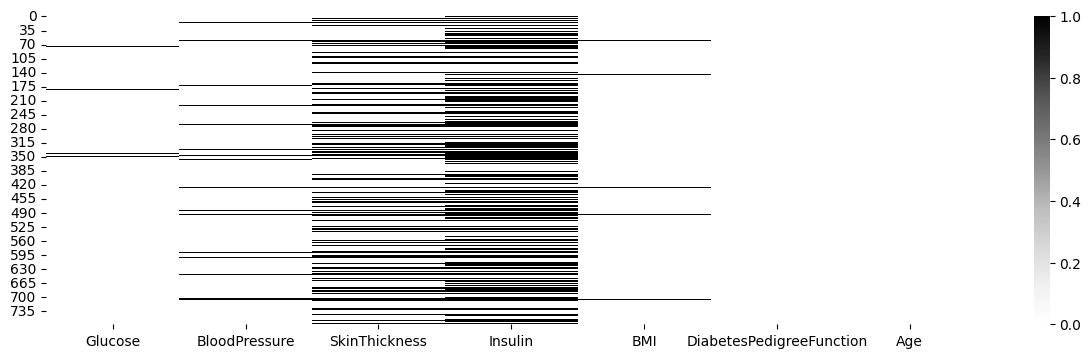

In [62]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Grays") #검은색이 결측치치

### 2.1.3 훈련과 예측에 사용할 정답값을 시각화로 보기

In [70]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

비율로 보기

In [71]:
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

임신횟수에 따른 당뇨병 발병 비율

In [73]:
#임신횟수별 비율
df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

비율이 1인건 뭐지? 결측값?

In [77]:
df_po=df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


횟수 자체가 적어서 그런 것

<Axes: >

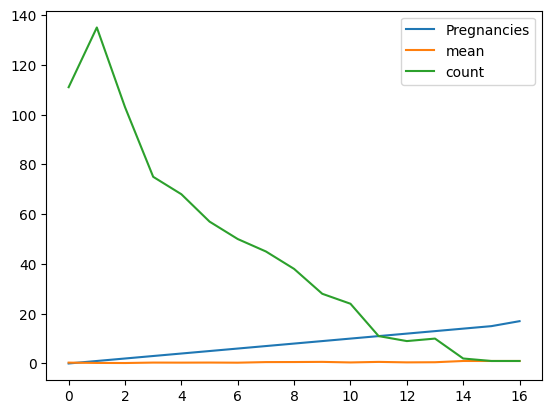

In [88]:
df_po.plot()

<Axes: >

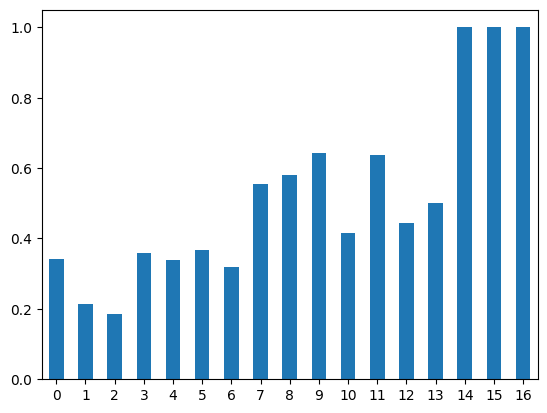

In [86]:
df_po["mean"].plot.bar(rot=0)

countplot

<Axes: xlabel='Outcome', ylabel='count'>

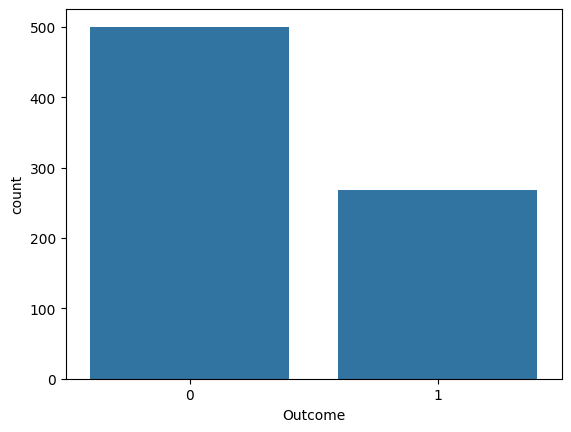

In [90]:
sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

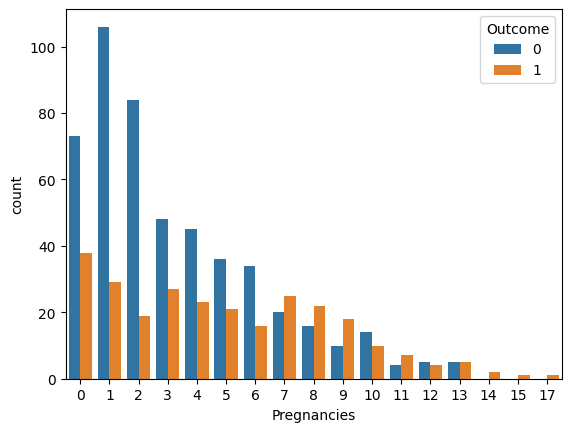

In [92]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

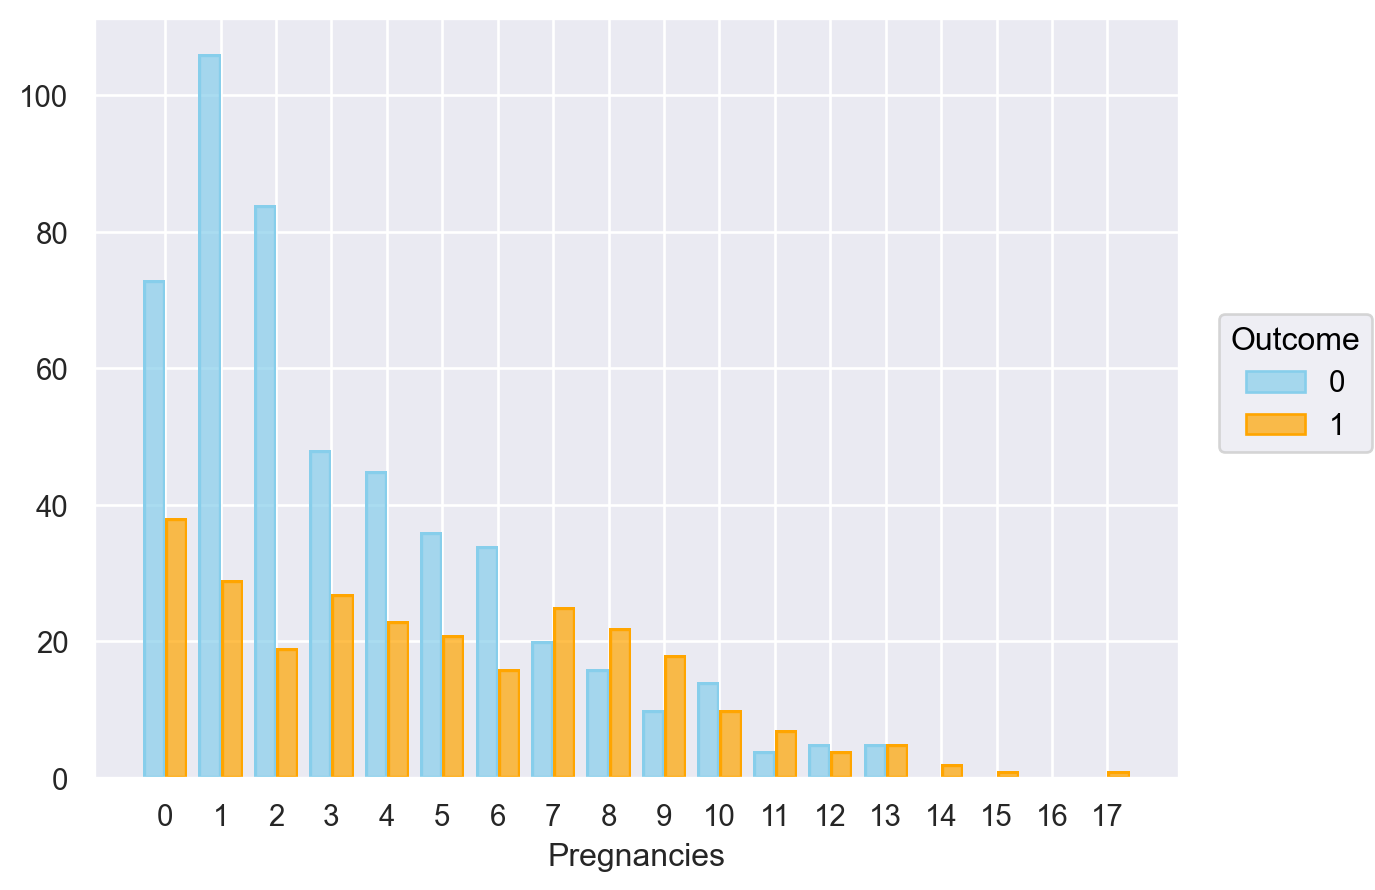

In [103]:
(
    so.Plot(df, x="Pregnancies", color="Outcome")
    .add(so.Bar(), so.Count(), so.Dodge())
    .scale(x=so.Continuous().tick(at=list(range(0,18))))
    .scale(color=["skyblue","orange"])
)

임신횟수의 많음에 따른 파생변수 만들기

In [108]:
df=df.assign(Pregnancies_high=lambda x: x.Pregnancies>6)
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

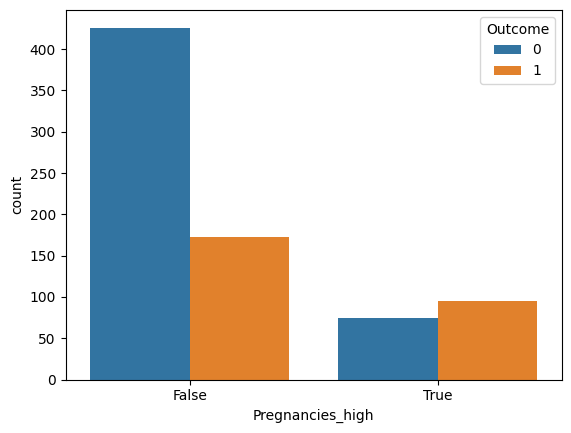

In [109]:
sns.countplot(df, x="Pregnancies_high", hue="Outcome")

### 2.1.4 두 개의 변수를 정답값에 따라 시각화 해보기

#### barplot

당뇨병 발병에 따른 BMI수치

<Axes: xlabel='Outcome', ylabel='BMI'>

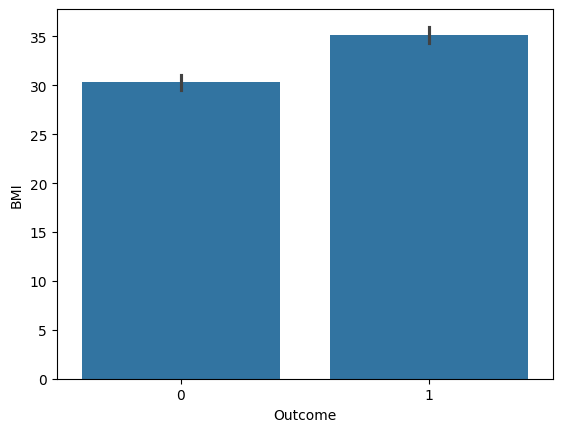

In [111]:
sns.barplot(df, x="Outcome",y="BMI")

당뇨병 - 포도당수치

<Axes: xlabel='Outcome', ylabel='Glucose'>

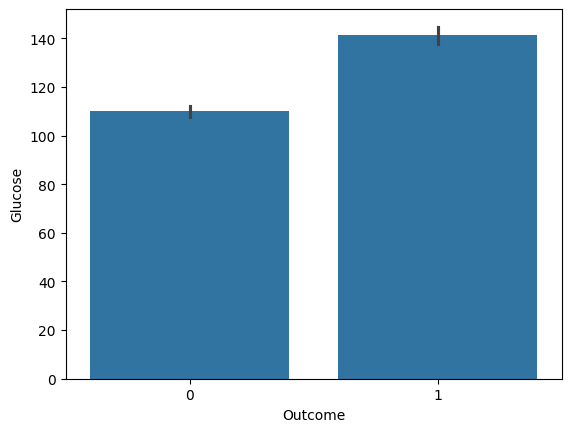

In [112]:
sns.barplot(df, x="Outcome", y="Glucose")

인슐린 수치가 0이상인 관측치에 대해 당뇨병 발병 비교

<Axes: xlabel='Outcome', ylabel='Insulin'>

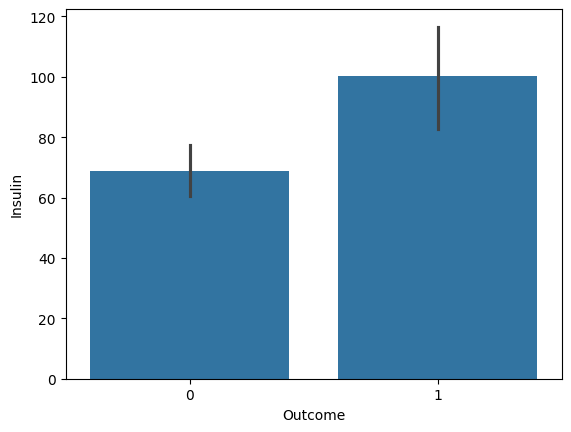

In [114]:
sns.barplot(df, x="Outcome",y="Insulin") #평균값

검은색 막대 : 95%신뢰구간

임신횟수 - 당뇨병 발병 비율

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

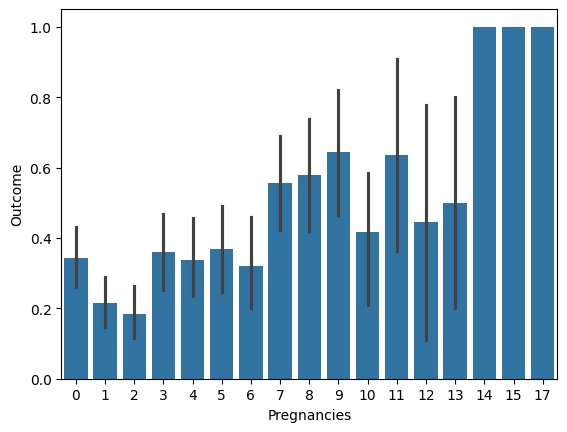

In [116]:
sns.barplot(df, x="Pregnancies", y="Outcome")

임신횟수 - 포도당수치

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

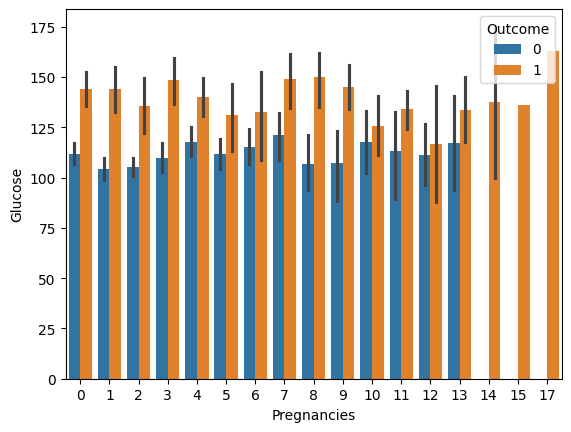

In [118]:
sns.barplot(df, x="Pregnancies", y="Glucose", hue="Outcome")

임신횟수 - BMI수치

<Axes: xlabel='Pregnancies', ylabel='BMI'>

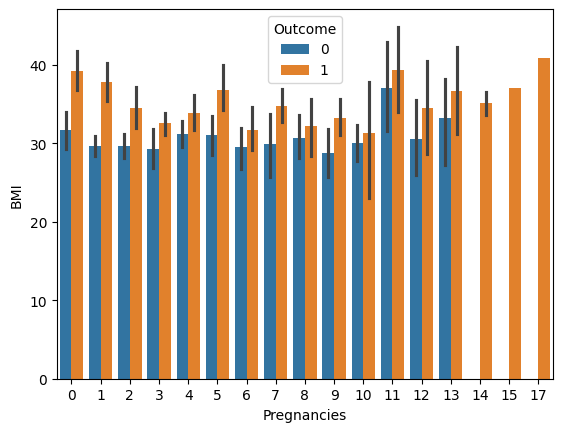

In [119]:
sns.barplot(df, x="Pregnancies", y="BMI", hue="Outcome")

임신횟수 - 인슐린수치

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

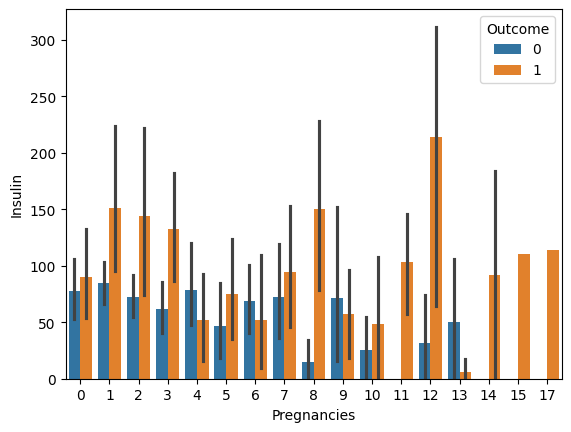

In [120]:
sns.barplot(df, x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

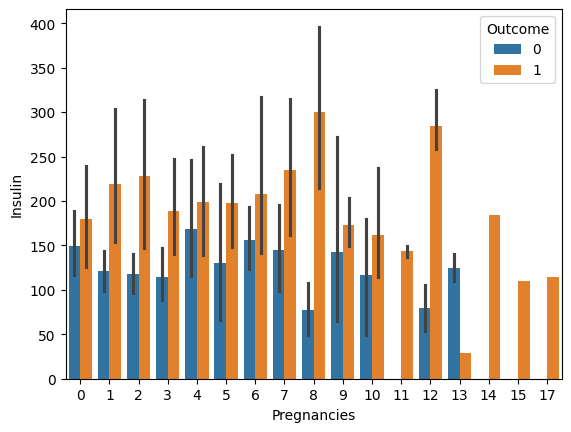

In [124]:
sns.barplot(df.query("Insulin>0"), x="Pregnancies", y="Insulin", hue="Outcome")

#### boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

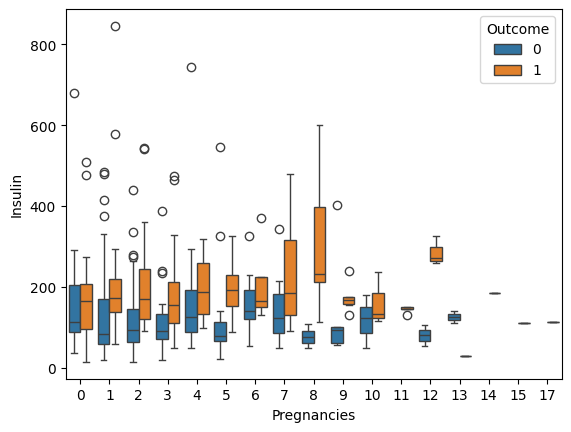

In [123]:
sns.boxplot(df.query("Insulin>0"), x="Pregnancies", y="Insulin", hue="Outcome")

#### violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

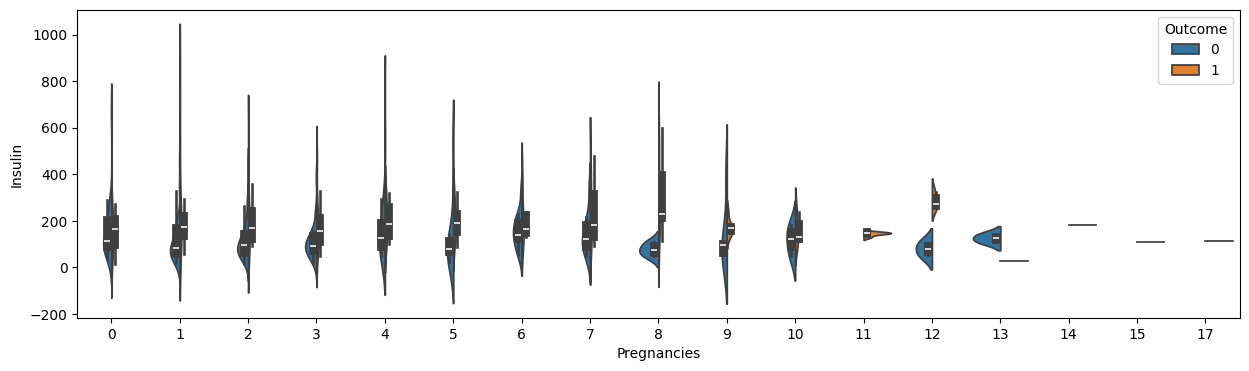

In [126]:
plt.figure(figsize=(15,4))
sns.violinplot(df.query("Insulin>0"), x="Pregnancies", y="Insulin", hue="Outcome", split=True)

#### swarmplot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


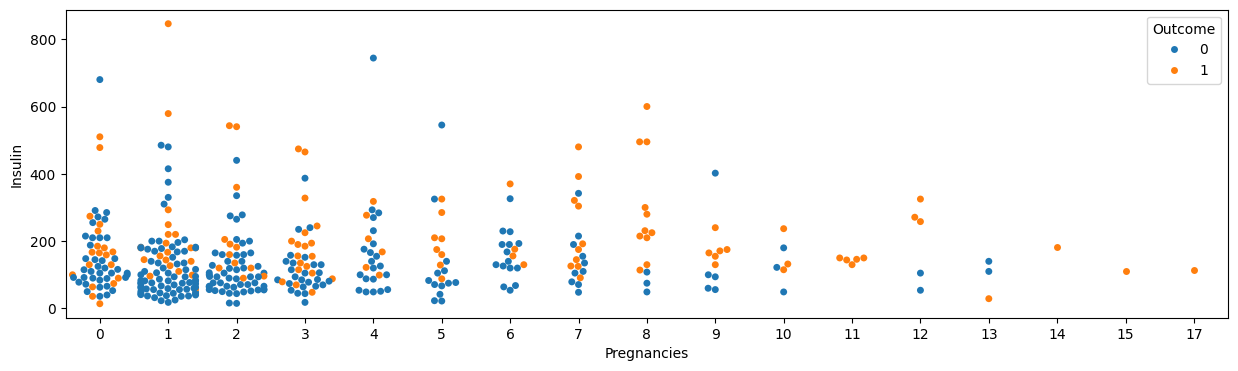

In [128]:
plt.figure(figsize=(15,4))
sns.swarmplot(df.query("Insulin>0"), x="Pregnancies", y="Insulin", hue="Outcome")

### 2.1.5 수치형 변수의 분포를 정답값에 따라 시각화 해보기

#### displot

In [132]:
df_0=df.query("Outcome==0")
df_1=df.query("Outcome==1")
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\swoo6\AppData\Local\Temp\ipykernel_19208\2685521112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
C:\Users\swoo6\AppData\Local\Temp\ipykernel_19208\2685521112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

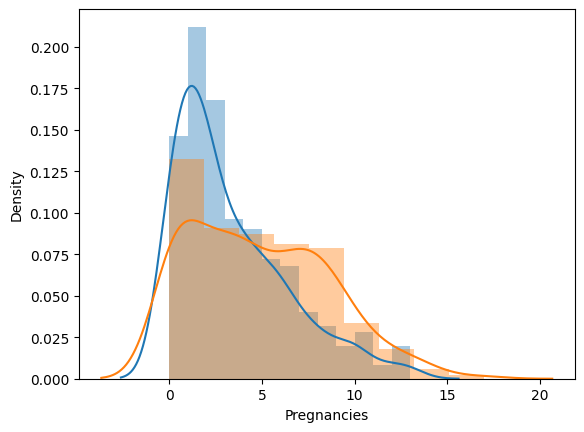

In [133]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

#### subplot

C:\Users\swoo6\AppData\Local\Temp\ipykernel_19208\2209682344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist=False, rug=True)
C:\Users\swoo6\AppData\Local\Temp\ipykernel_19208\2209682344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist

<Axes: xlabel='Age', ylabel='Density'>

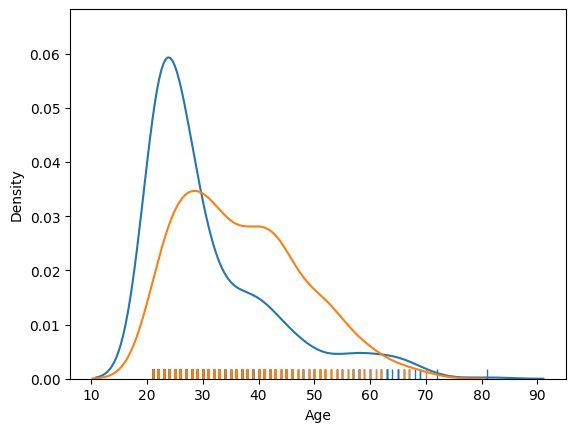

In [140]:
sns.distplot(df_0["Age"], hist=False, rug=True)
sns.distplot(df_1["Age"], hist=False, rug=True)